# Dense Coding

## 2 bits from a Qubit

Let's start this question with the standard SuperDense Coding protocol, given in QCQI (page 97), which uses a *maximally* entangled two-qubit state 

$$\left(\frac{|00\rangle + |11\rangle}{\sqrt{2}}\right)\$$

to allow Alice to transmit 2 bits of information to Bob, by sending her qubit to Bob.

Describe the protocol briefly in your own words. Since this is an SoC and requires coding (*wink wink*), code up the circuit in Qiskit. 

Specifically, code up a circuit which changes depending on the message (of two bits) being transferred (you can pass the circuit and the message as parameters to a function, for example)

In [12]:
# Write your code here for the above
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

def func(qc, message):
    if(message == '01'):
        qc.z(0)
    elif(message == '10'):
        qc.x(0)
    elif(message == '11'):
        qc.x(0)
        qc.z(0)
    


message = '10'
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.barrier()
func(qc, message)
qc.barrier()
qc.cx(0, 1)
qc.h(0)
qc.measure_all()
qc.draw()


┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

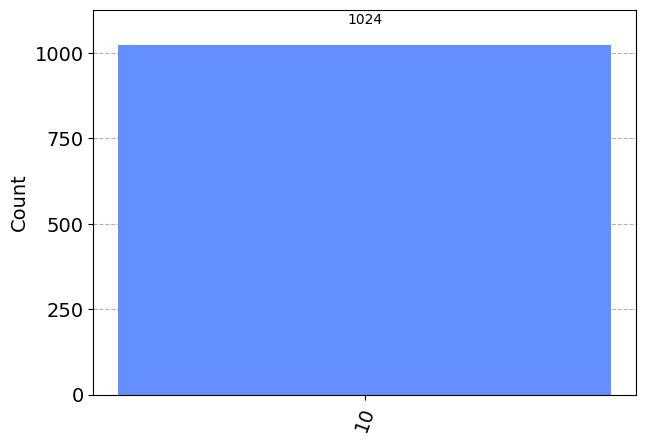

In [13]:
usim = Aer.get_backend('aer_simulator')
result = usim.run(qc).result()
plot_histogram(result.get_counts())

## Transmitting 3 bits

You've now transmitted 2 bits successfully using a quantum channel. What else can we do?

Suppose Alice and Bob now share a 3 qubit entangled state, with Alice having 2 out of the 3 qubits. Their goal is to transmit 3 bits, using those 3 qubits. 

1. Propose a 3 qubit state which would suit Alice and Bob. Take inspiration from the previous part, and why you think the protocol for 2 qubits works.

2. Now that you have a shared state, design a protocol, that allows Alice to transmit a 3 bit message, by sending her 2 qubits to Bob. You can also code it up on Qiskit, with the same specifications as the previous coding task.

Write about the state and the protocol here : 

In [14]:
# Write your code for the protocol below
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
def func(qc, message):
    if(message[0] == '1'):
        qc.x(2)
    if(message[2] == '1'):
        qc.z(2)
    if(message[1] == '1'):
        qc.x(1)

message = '101'
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
#st0 = Statevector.from_instruction(qc)

func(qc, message)
qc.barrier()
#st1 = Statevector.from_instruction(qc)
qc.cx(0,2)
qc.cx(0,1)
qc.h(0)

#st2 = Statevector.from_instruction(qc)
qc.measure_all()
qc.draw()
#print(st0, st1, st2)

┌───┐           ░            ░           ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■────■───░────────────░───■────■──┤ H ├─░─┤M├──────
        └───┘┌─┴─┐  │   ░            ░   │  ┌─┴─┐└───┘ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░────────────░───┼──┤ X ├──────░──╫─┤M├───
             └───┘┌─┴─┐ ░ ┌───┐┌───┐ ░ ┌─┴─┐└───┘      ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░─┤ X ├┤ Z ├─░─┤ X ├───────────░──╫──╫─┤M├
                  └───┘ ░ └───┘└───┘ ░ └───┘           ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════════════════════╩══╩══╩═
                                                          0  1  2

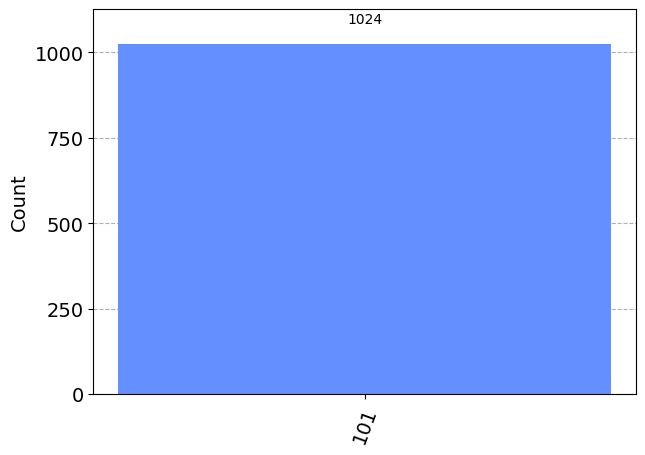

In [15]:
sim = Aer.get_backend('aer_simulator') 
results = sim.run(qc).result().get_counts()
plot_histogram(results)

3. Suppose Bob wanted to send some information to Alice. Show that he can't design a protocol to send more than 2 qubits of information with the 1 qubit he can send.

Using 1 bit manipulation, he can only achieve 4 max states, so not more than 2 bits of info elaborate more 

## Doing Better

You might have seen that we're transmitting 2 qubits to send 3 bits of information here, which is less efficient than transmitting 1 qubit to get 2 bits of information.

An obvious way to do better is to do the previous protocol twice, and get 4 bits of information for the two qubits transferred.

Can you think of a way to achieve this, in a similar line to the previous methods, but with one common shared state (and not two separate Bell states)?

Hint : Think of a 4 qubit state to share, and see if Alice, with her two qubits, can operate her qubits in different ways so as to get other basis states

$$\ket{\psi} = \frac{1}{2} \left( \ket{0000} + \ket{0101} + \ket{1010} + \ket{1111} \right) $$

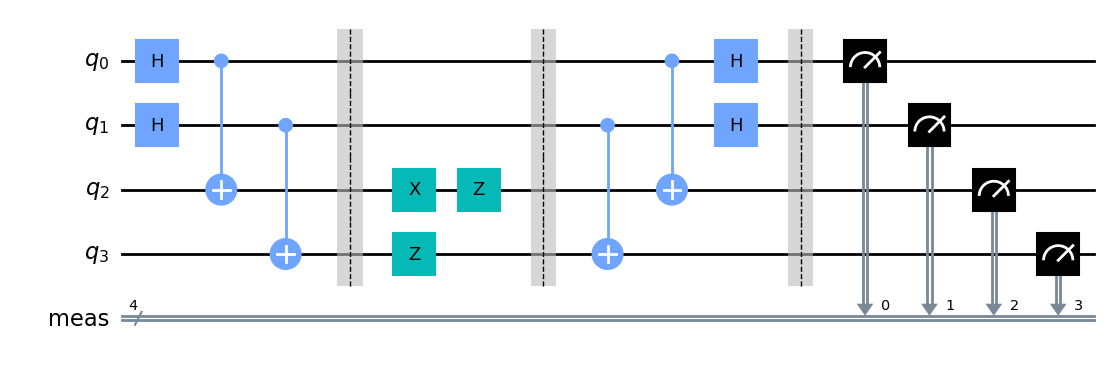

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
def func(qc, message):
    if(message[0] == '1'):
        qc.x(3)
    if(message[1] == '1'):
        qc.x(2)
    if(message[2] == '1'):
        qc.z(3)
    if(message[3] == '1'):
        qc.z(2)

message = '0111'
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,2)
qc.h(1)
qc.cx(1,3)
qc.barrier()

func(qc, message)

qc.barrier()

qc.cx(1,3)
qc.h(1)
qc.cx(0,2)
qc.h(0)
qc.measure_all()
qc.draw('mpl')


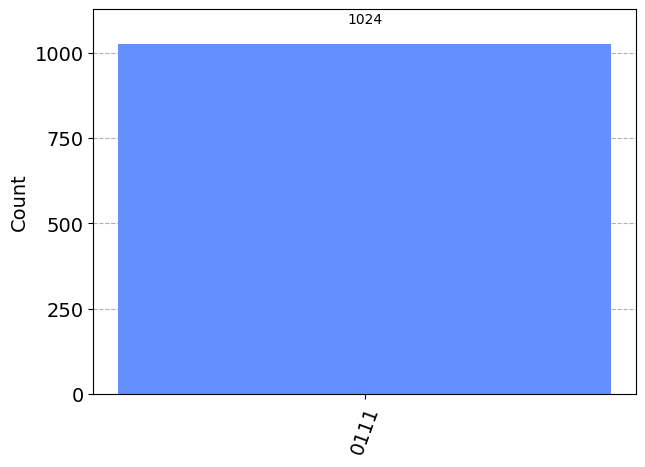

In [17]:
sim = sim = Aer.get_backend('aer_simulator') 
results = sim.run(qc).result().get_counts()
plot_histogram(results)
